# Modelos de clasificación

**Autor/es:**
+ DESHI

**Correos Electrónicos:**
+ NULL

**Fecha de Creación:** Octubre de 2024  
**Versión:** 1.0

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 2 - parte 1 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería civil en informática de la Universidad del Bío Bío - Sede Concepción

# Carga de datos

Evaluación
1. Construcción de Modelos de línea base

(a) Construir una línea base que contenga 4 modelos para predecir si un empleado dejará la empresa o no; los 4 modelos se deben obtener considerando los algoritmos revisados en clases (Logistic Regression, Random Forest DecisionTreeClassifier, NaiveBayes) .
Los modelos de esta línea base deben tener TODOS un accuracy superior a 0.7 y un ROC AUC superior a 0.7.

(b) Calcular todas las métricas para cada modelo de la línea base mejorada: accuracy, precision, recall, f1-score, matriz de confusión, roc auc

(c) Nota. El conjunto de datos debe dividirse en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo. En caso de que esto se omita entonces se considera que el modelo ha sido entrenado de forma incorrecta.

2. Construcción de Modelos de línea base mejorada

(a) Considerando la línea base anterior, es decir, manteniendo las mismas configuraciones de los modelos (hiper parámetros), aplicar alguna técnica de las revisadas en clases que le permita mejorar el rendimiento considerando el ROC AUC que se requiere que sea superior a 0.78 para cada modelo.

(b) Calcular todas las métricas para cada modelo de la línea base mejorada: accuracy, precision, recall, f1-score, matriz de confusión, roc auc

3. Evaluación de Modelos
4. Seleccionar y justificar la elección de una métrica para seleccionar el mejor modelo

(a) Evaluar el rendimiento del mejor modelo de la línea base mejorada utilizando métricas:
i. accuracy,
ii. precision,
iii. recall,
iv. f1-score,
v. roc auc
vi. matriz de confusión

(b) Los resultados anteriores se deben incluir en una tabla que debe tener el aspecto:

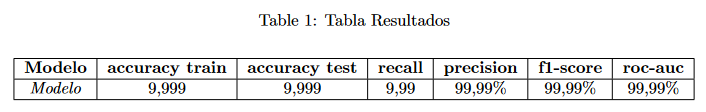

(c) Interpretar cada una de las métricas de la tabla anterior en el contexto del negocio.

(d) Interpretar la matriz de confusión del modelo seleccionado.

(e) Obtener una conclusión acerca de existencia/inexistencia de overfitting del modelo seleccionado.

(f) Nota. El modelo seleccionado debe cumplir, con al menos una métrica, con un rendimiento mínimo de 0.80.

5. Predicciones

(a) Utilizar el mejor modelo seleccionado para realizar predicciones desde un archivo JSON que contenga valores para las variables independientes generando un archivo JSON que contiene el valor de las predicciones junto al valor de las variables independientes.

6. Respuesta a la pregunta al final del notebook

(a) Responder con las justificaciones correspondientes a la pregunta al final del notebook base.

In [1]:
# Descargar el archivo
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/empleados.csv.zip

# Descomprimir el archivo
!unzip -q empleados.csv.zip

# Eliminar el archivo zip
!rm empleados.csv.zip

# Eliminar la carpeta __MACOSX si se creó
!rm -rf __MACOSX

--2024-10-31 01:53:54--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/empleados.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1716432 (1.6M) [application/zip]
Saving to: ‘empleados.csv.zip’

empleados.csv.zip   100%[===================>]   1.64M  --.-KB/s    in 0.08s   

2024-10-31 01:53:54 (19.3 MB/s) - ‘empleados.csv.zip’ saved [1716432/1716432]



# Metodología CRISP-DM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score

from collections import Counter

%matplotlib inline


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, mean_squared_error
from sklearn.tree import plot_tree


import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score,  classification_report
from sklearn.feature_selection import SelectKBest

from collections import Counter

In [5]:
data = pd.read_csv("empleados.csv", sep=",")

## Fase 2 - Comprensión de los datos

In [6]:
# Obtener la cantidad de filas y columnas (observaciones y características de los datos)
data.shape

(74498, 24)

In [7]:
# Nombre de las columnas
data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [8]:
# Obtiene las primeras 5 observaciones
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [9]:
# Obtiene detalles de las columnas (características de empleados)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents  

Se tienen 16 variables cualitativas y 8 variables cuantitativas

In [10]:
# Usaremos un método resumen de estadísticas numéricas
numeric_features = data.describe().T
numeric_features

,count,mean,std,min,25%,50%,75%,max
Employee ID,74498.0,37249.500000,21505.864514,1.0,18625.25,37249.5,55873.75,74498.0
Age,74498.0,38.529746,12.083456,18.0,28.00,39.0,49.00,59.0
Years at Company,74498.0,15.721603,11.223744,1.0,7.00,13.0,23.00,51.0
Monthly Income,74498.0,7299.379514,2152.508566,1226.0,5652.00,7348.0,8876.00,16149.0
Number of Promotions,74498.0,0.832935,0.995289,0.0,0.00,1.0,2.00,4.0
Distance from Home,74498.0,49.991584,28.513611,1.0,25.00,50.0,75.00,99.0
Number of Dependents,74498.0,1.650326,1.553633,0.0,0.00,1.0,3.00,6.0
Company Tenure,74498.0,55.727456,25.399349,2.0,36.00,56.0,76.00,128.0


**Interpretación**


  Primer quartil: El 25% de los encuestados tiene una edad igual o inferior a 28 años

  El promedio de edad de los encuestados es de 39 años

  Desviación estándar: La mayor concentración de empleados tiene una edad que se encuentra entre los 27 y los 51 años


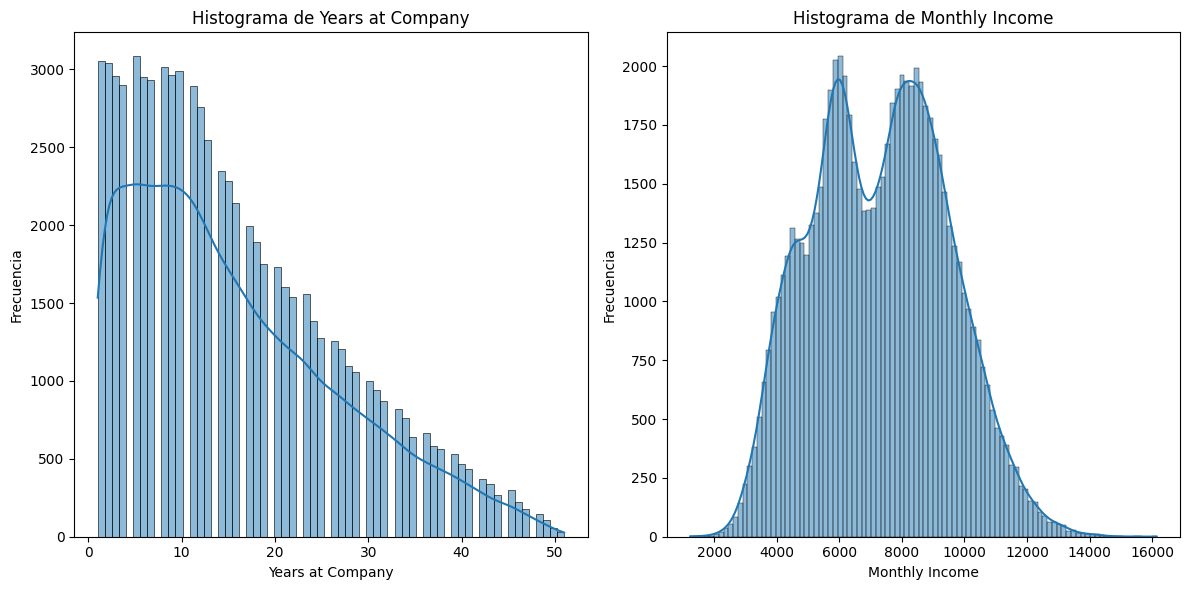

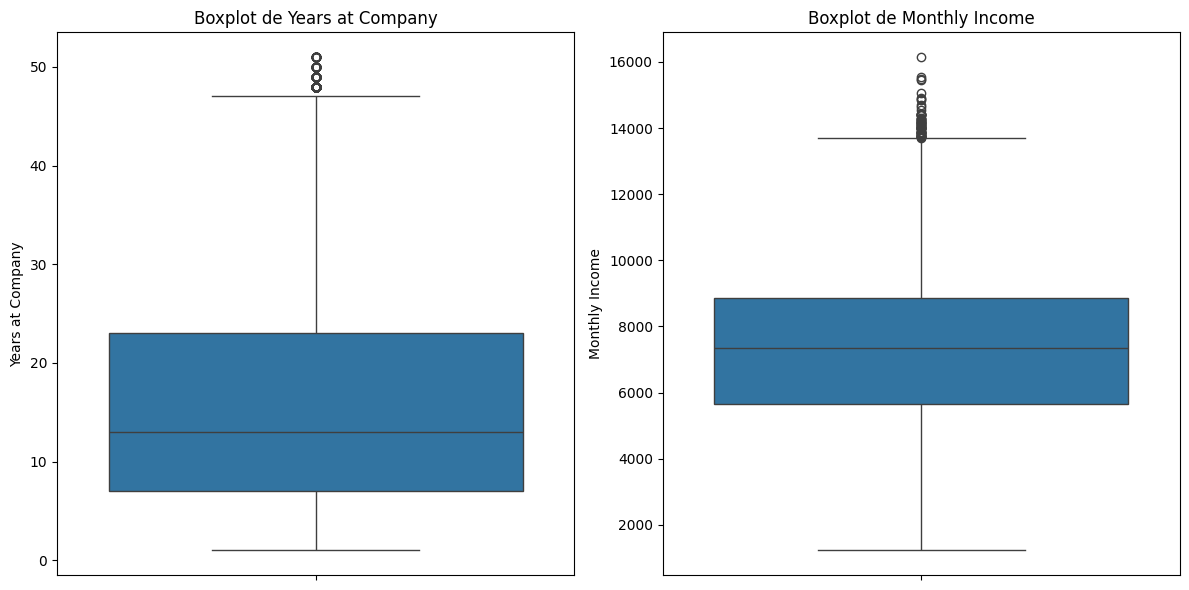

In [11]:
features = ['Years at Company', 'Monthly Income']
numeric_features_selected = numeric_features.loc[features]

plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histograma de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot de {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [12]:
# Resumen de estadísticas descriptivas para variables categóricas (si las hay)
data.describe(include=[object]).T

,count,unique,top,freq
Gender,74498,2,Male,40826
Job Role,74498,5,Technology,19322
Work-Life Balance,74498,4,Good,28158
Job Satisfaction,74498,4,High,37245
Performance Rating,74498,4,Average,44719
Overtime,74498,2,No,50157
Education Level,74498,5,Bachelor’s Degree,22331
Marital Status,74498,3,Married,37419
Job Level,74498,3,Entry,29780
Company Size,74498,3,Medium,37231


In [13]:
# Imprimimos los años en la compañia y la edad de los empleados para ver si hay alguna discrepancia
print(data[['Age', 'Years at Company']])

       Age  Years at Company
0       31                19
1       59                 4
2       24                10
3       36                 7
4       56                41
...    ...               ...
74493   56                42
74494   30                15
74495   52                 5
74496   18                 4
74497   59                48

[74498 rows x 2 columns]


:o

In [14]:
data.query('Age <= 18')

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
148,1115,18,Female,7,Technology,8546,Poor,Very High,High,0,...,1,Senior,Small,64,Yes,No,No,Fair,High,Left
158,70584,18,Male,6,Technology,7631,Fair,Low,Below Average,0,...,3,Entry,Medium,69,No,No,No,Good,Low,Left
239,30591,18,Female,9,Media,4764,Excellent,High,Average,1,...,1,Entry,Large,57,No,No,No,Good,High,Stayed
250,14039,18,Male,10,Media,5842,Good,Medium,High,0,...,0,Senior,Large,21,No,No,Yes,Good,Low,Stayed
332,53038,18,Male,3,Healthcare,8548,Good,Very High,Average,0,...,1,Mid,Medium,58,No,No,Yes,Excellent,Medium,Left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74301,46181,18,Female,7,Technology,7782,Fair,High,High,0,...,1,Entry,Small,14,No,No,Yes,Good,High,Left
74400,15886,18,Female,5,Finance,8220,Good,High,Average,1,...,0,Mid,Medium,34,No,No,No,Good,Low,Stayed
74425,69333,18,Male,1,Healthcare,6942,Excellent,High,Average,0,...,3,Mid,Medium,23,No,No,No,Fair,Medium,Left
74478,25649,18,Male,6,Healthcare,8979,Excellent,High,Average,0,...,1,Entry,Small,18,No,No,No,Poor,Medium,Left


       Age  Years at Company
0       31                19
2       24                10
4       56                41
8       57                44
12      47                38
...    ...               ...
74491   34                25
74493   56                42
74494   30                15
74496   18                 4
74497   59                48

[29812 rows x 2 columns]


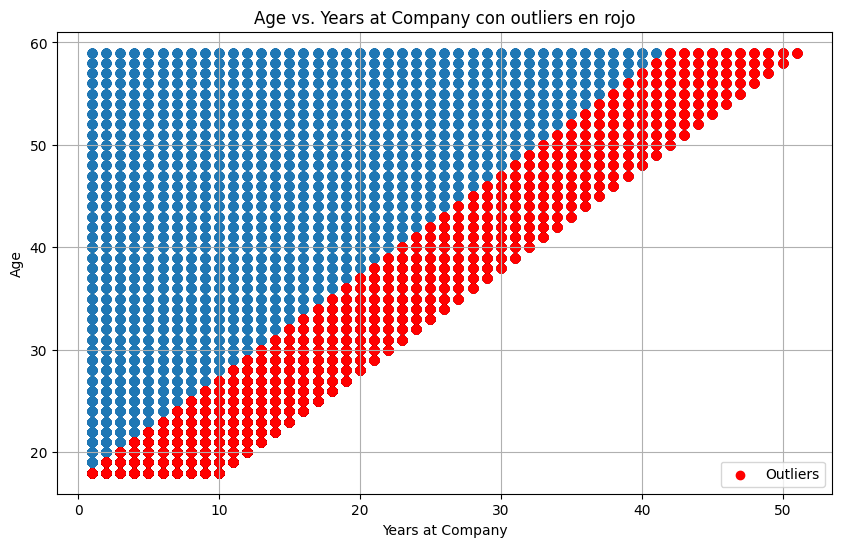

In [15]:
outliers = data[data['Age'] - data['Years at Company'] < 18]
print(outliers[['Age', 'Years at Company']])

plt.figure(figsize=(10, 6))
plt.scatter(data['Years at Company'], data['Age'])
plt.scatter(outliers['Years at Company'], outliers['Age'], color='red', label='Outliers')
plt.xlabel('Years at Company')
plt.ylabel('Age')
plt.title('Age vs. Years at Company con outliers en rojo')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
data[['Gender','Age', 'Education Level', 'Company Size', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction', 'Overtime', 'Distance from Home', 'Remote Work', 'Number of Dependents', 'Job Level', 'Performance Rating', 'Company Tenure', 'Company Reputation', 'Employee Recognition', 'Attrition' ]]

,Gender,Age,Education Level,Company Size,Monthly Income,Work-Life Balance,Job Satisfaction,Overtime,Distance from Home,Remote Work,Number of Dependents,Job Level,Performance Rating,Company Tenure,Company Reputation,Employee Recognition,Attrition
0,Male,31,Associate Degree,Medium,5390,Excellent,Medium,No,22,No,0,Mid,Average,89,Excellent,Medium,Stayed
1,Female,59,Master’s Degree,Medium,5534,Poor,High,No,21,No,3,Mid,Low,21,Fair,Low,Stayed
2,Female,24,Bachelor’s Degree,Medium,8159,Good,High,No,11,No,3,Mid,Low,74,Poor,Low,Stayed
3,Female,36,High School,Small,3989,Good,High,No,27,Yes,2,Mid,High,50,Good,Medium,Stayed
4,Male,56,High School,Medium,4821,Fair,Very High,Yes,71,No,0,Senior,Average,68,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,Female,56,Associate Degree,Medium,7830,Poor,Medium,Yes,40,No,0,Senior,Average,60,Poor,Medium,Stayed
74494,Female,30,Master’s Degree,Medium,3856,Good,Medium,Yes,45,No,0,Entry,Average,20,Good,Medium,Left
74495,Male,52,Associate Degree,Small,5654,Good,Very High,No,4,No,4,Mid,Below Average,7,Good,High,Left
74496,Male,18,Bachelor’s Degree,Large,5276,Fair,High,No,13,No,3,Mid,Average,5,Poor,High,Stayed


In [17]:
filtered_df = data[
    (data['Company Reputation'] == 'Poor') |
    (data['Monthly Income'] < 5000) |
    (data['Work-Life Balance'] == 'Poor') |
    (data['Company Tenure'] < 40) |
    (data['Employee Recognition'] == 'Low')
]

filtered_df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
6,64970,47,Male,23,Education,3681,Fair,High,High,1,...,3,Entry,Small,93,No,No,No,Good,Medium,Left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


In [18]:
left_employees = data[data['Attrition'] == 'Left']
left_employees

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3,...,0,Mid,Medium,47,No,No,Yes,Fair,High,Left
6,64970,47,Male,23,Education,3681,Fair,High,High,1,...,3,Entry,Small,93,No,No,No,Good,Medium,Left
9,15944,24,Female,1,Healthcare,7319,Poor,High,Average,1,...,4,Entry,Large,45,No,No,Yes,Good,Low,Left
10,29972,30,Female,12,Education,5443,Good,High,Average,1,...,1,Entry,Small,17,No,No,No,Good,Medium,Left
11,9063,29,Female,6,Healthcare,8950,Poor,Medium,Low,2,...,0,Mid,Medium,38,No,No,No,Poor,Medium,Left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74485,63763,56,Male,3,Education,3703,Poor,High,Below Average,2,...,1,Mid,Medium,20,No,No,No,Good,High,Left
74489,44995,39,Male,25,Finance,11586,Good,High,Average,0,...,2,Entry,Medium,58,No,No,No,Good,Low,Left
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left


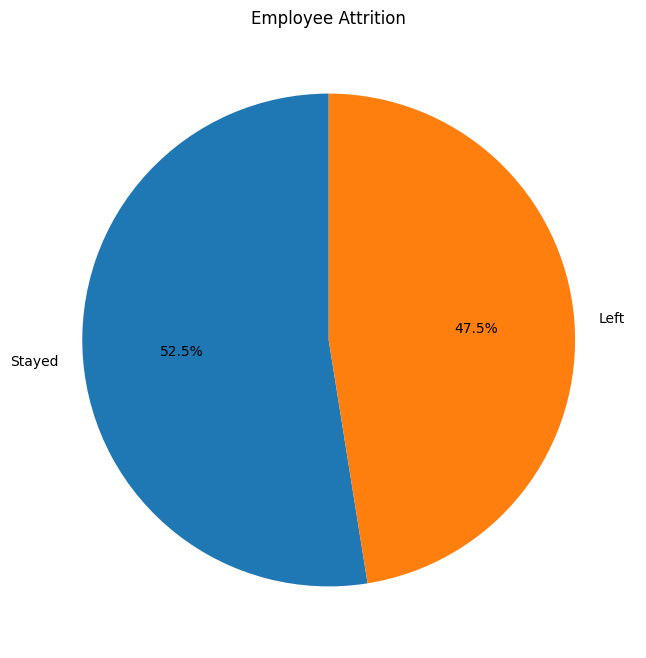

In [19]:
attrition_counts = data['Attrition'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Employee Attrition')
plt.show()

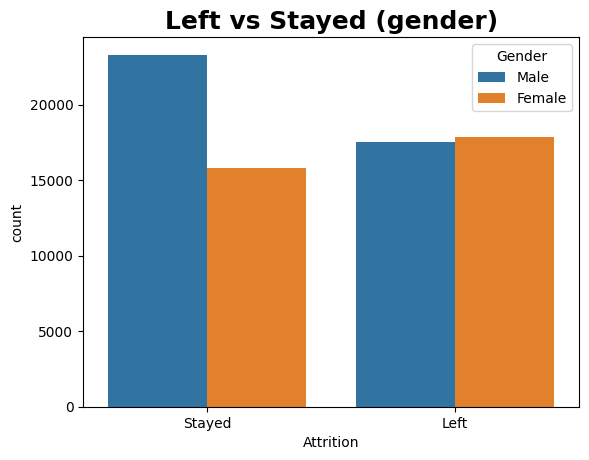

In [20]:
plt.title("Left vs Stayed (gender)", fontsize = 18, fontweight="bold")
sns.countplot(x="Attrition", hue="Gender", data=data);

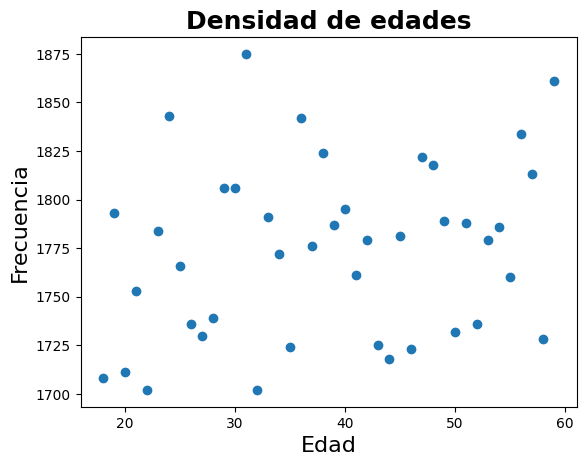

In [21]:
x_values = data.Age.unique()
y_values = data.Age.value_counts().tolist()
plt.scatter(x_values, y_values, marker='o');
plt.title('Densidad de edades', fontsize=18, fontweight="bold")
plt.xlabel('Edad', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.show()

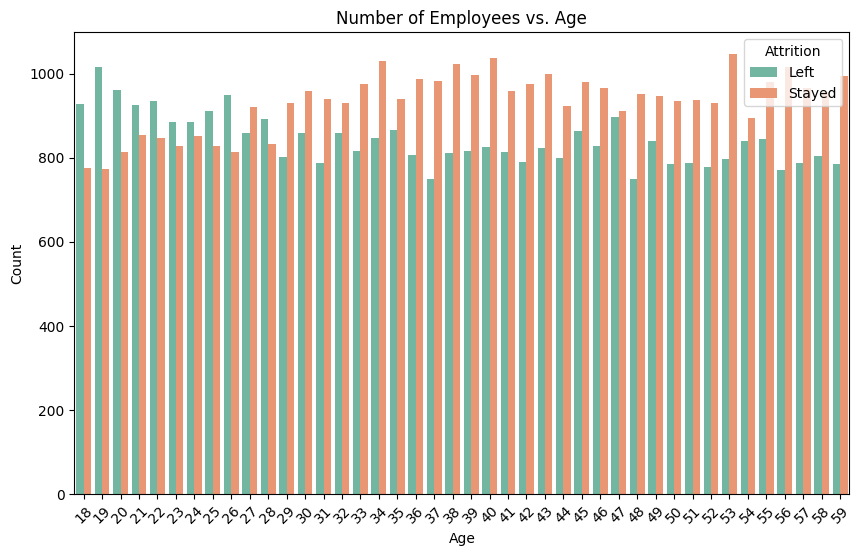

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Attrition', data=data, palette="Set2")
plt.title('Number of Employees vs. Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Comprensión de datos:**

Para comenzar con el análisis, identificamos 16 variables cualitativas y 8 variables cuantitativas.


En una interpretación anterior de estadísticas numéricas se tiene que:

- Primer quartil: El 25% de los encuestados tiene una edad igual o inferior a 28 años.

- El promedio de edad de los encuestados es de 39 años.

- Desviación estándar: La mayor concentración de empleados tiene una edad que se encuentra entre los 27 y los 51 años.


Hay una cola derecha en la grafica de distribución en 'Years at Company, lo que significa que algunos empleados tienen más años en la empresa que la mayoría, en otras palabras, existe sesgo hacia la izquierda.

También encontramos una asimetría a la derecha respecto a la distribución 'Monthly Income'.



Luego, notamos una discrepancia en "Years at Company", en donde hay empleados que tienen datos incorrectos respecto a los años en la empresa. Un ejemplo es un empleado de 59 años, en donde sus años en la compañía son de 48  años, lo que quiere decir que comenzó en empresa con 11 años de edad.

Respecto a la gráfica de torta: el 47.5% de los empleados se ha ido de la empresa, mientras que el 52.5% de los empleados se quedaron. Entre los que se quedan, la mayoría son hombres, aunque, de quienes se fueron, hubo un balance entre hombres y mujeres.

En la gráfica de la cantidad de empleados vs la edad se logra identificar que la mayoría de empleados que se han ido ronda entre los 18, 19 y 20 años de edad.









## Fase 3 - Preparación de los datos

In [23]:
# Copiar el DataFrame para evitar modificar el original
df_final = data.copy()

In [24]:
# Obtiene la cantidad de registros con valores nulos
df_final.isna().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


In [25]:
# Elimina las columnas con cero aporte analítico
df_final.drop(['Employee ID'],axis=1)

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,Yes,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,30,Female,15,Education,3856,Good,Medium,Average,2,Yes,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,52,Male,5,Education,5654,Good,Very High,Below Average,0,No,...,4,Mid,Small,7,No,No,No,Good,High,Left
74496,18,Male,4,Education,5276,Fair,High,Average,0,No,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


In [26]:
outliers = df_final[df_final['Age'] - df_final['Years at Company'] < 18]
print(outliers[['Age', 'Years at Company']])

outlier_indices = outliers.index

outlier_indices

       Age  Years at Company
0       31                19
2       24                10
4       56                41
8       57                44
12      47                38
...    ...               ...
74491   34                25
74493   56                42
74494   30                15
74496   18                 4
74497   59                48

[29812 rows x 2 columns]


Index([    0,     2,     4,     8,    12,    13,    14,    16,    18,    20,
       ...
       74478, 74480, 74482, 74487, 74489, 74491, 74493, 74494, 74496, 74497],
      dtype='int64', length=29812)

In [27]:
# Eliminación
df_final.drop(df_final[df_final['Age'] - df_final['Years at Company'] < 18].index, inplace=True)

In [28]:
# Tratamiento de variables categóricas
df_final.describe(include = np.object_)

,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,44686,44686,44686,44686,44686,44686,44686,44686,44686,44686,44686,44686,44686,44686,44686,44686
unique,2,5,4,4,4,2,5,3,3,3,2,2,2,4,4,2
top,Male,Technology,Good,High,Average,No,Bachelor’s Degree,Married,Entry,Medium,No,No,No,Good,Low,Stayed
freq,24549,11571,16908,22272,26808,29987,13433,22325,17909,22292,36130,42507,37445,22220,17758,23450


In [29]:
# Resumen de estadísticas descriptivas para variables categóricas (si las hay)
df_final.describe(include=[object]).T

,count,unique,top,freq
Gender,44686,2,Male,24549
Job Role,44686,5,Technology,11571
Work-Life Balance,44686,4,Good,16908
Job Satisfaction,44686,4,High,22272
Performance Rating,44686,4,Average,26808
Overtime,44686,2,No,29987
Education Level,44686,5,Bachelor’s Degree,13433
Marital Status,44686,3,Married,22325
Job Level,44686,3,Entry,17909
Company Size,44686,3,Medium,22292


In [30]:
df_final['Attrition_Num'] = df_final['Attrition'].map({'Left': 1, 'Stayed': 0})

numeric_features_with_attrition = df_final.drop(columns=['Employee ID']).select_dtypes(include=['number'])
correlation_matrix = numeric_features_with_attrition.corr()
attrition_correlation = correlation_matrix['Attrition_Num']
print(attrition_correlation)

Age                    -0.040114
Years at Company       -0.062105
Monthly Income         -0.014970
Number of Promotions   -0.082546
Distance from Home      0.101013
Number of Dependents   -0.072419
Company Tenure         -0.027074
Attrition_Num           1.000000
Name: Attrition_Num, dtype: float64


Se convirtió la variable que se pretende predecir a una variable numérica, donde la correlación entre "Ingreso Mensual" y "Attrition_Num" es -0.014970, indicando una correlación negativa moderada. Es decir, a medida que el ingreso mensual de los empleados aumenta, la probabilidad de que dejen la empresa tiende a disminuir. Mientras que, si Distance from Home tiene 0.101013 aumenta, la probabilidad de que los empleados dejen la empresa también aumenta.

In [31]:
df_final = df_final.replace({
    "Gender": {"Female": 1, "Male": 2},
    "Attrition": {"Left": 1, "Stayed": 0},
    "Job Role": {"Media": 1, "Education": 2, "Technology": 3, "Finance": 4, "Healthcare": 5},
    "Work-Life Balance": {"Good": 5, "Poor": 1, "Fair": 4, "Excellent": 7},
    "Job Satisfaction": {"Very High": 5, "High": 4, "Medium": 3, "Low": 2, "Very Low": 1},
    "Performance Rating": {"Excellent": 7, "Below Average": 3, "High": 6, "Low": 2, "Average": 1},
    "Overtime": {"Yes": 1, "No": 0},
    "Education Level": {"High School": 1, "Master’s Degree": 7, "Bachelor’s Degree": 2, "Associate Degree": 3, "PhD": 4},
    "Marital Status": {"Married": 1, "Single": 2, "Divorced": 0},
    "Job Level": {"Mid": 2, "Entry": 1, "Senior": 3},
    "Company Size": {"Small": 1, "Medium": 2, "Large": 3},
    "Remote Work": {"Yes": 1, "No": 0},
    "Leadership Opportunities": {"Yes": 1, "No": 0},
    "Innovation Opportunities": {"Yes": 1, "No": 0},
    "Company Reputation": {"Excellent": 7, "Good": 5, "Fair": 4, "Poor": 1},
    "Employee Recognition": {"Very High": 4, "High": 3, "Medium": 2, "Low": 1}
})

In [32]:
# Categoricas convertidas a numericas
categorical_features = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
                        'Performance Rating', 'Overtime', 'Education Level',
                        'Marital Status', 'Job Level', 'Company Size', 'Remote Work',
                        'Leadership Opportunities', 'Innovation Opportunities',
                        'Company Reputation', 'Employee Recognition','Attrition']

filtered_categorical_df = df_final[categorical_features]

correlation_matrix = filtered_categorical_df.corr()

# Muestra la correlación
attrition_correlation = correlation_matrix['Attrition']
print(attrition_correlation)


Gender                     -0.103785
Job Role                   -0.003181
Work-Life Balance          -0.166791
Job Satisfaction            0.012600
Performance Rating          0.000083
Overtime                    0.055285
Education Level            -0.006850
Marital Status              0.232272
Job Level                  -0.315300
Company Size               -0.023972
Remote Work                -0.222778
Leadership Opportunities   -0.014257
Innovation Opportunities   -0.025431
Company Reputation         -0.092129
Employee Recognition       -0.003109
Attrition                   1.000000
Name: Attrition, dtype: float64


In [33]:
# Guarda la data usando esta alternativa de transformación
dt_final_dummies_manual = df_final.copy()

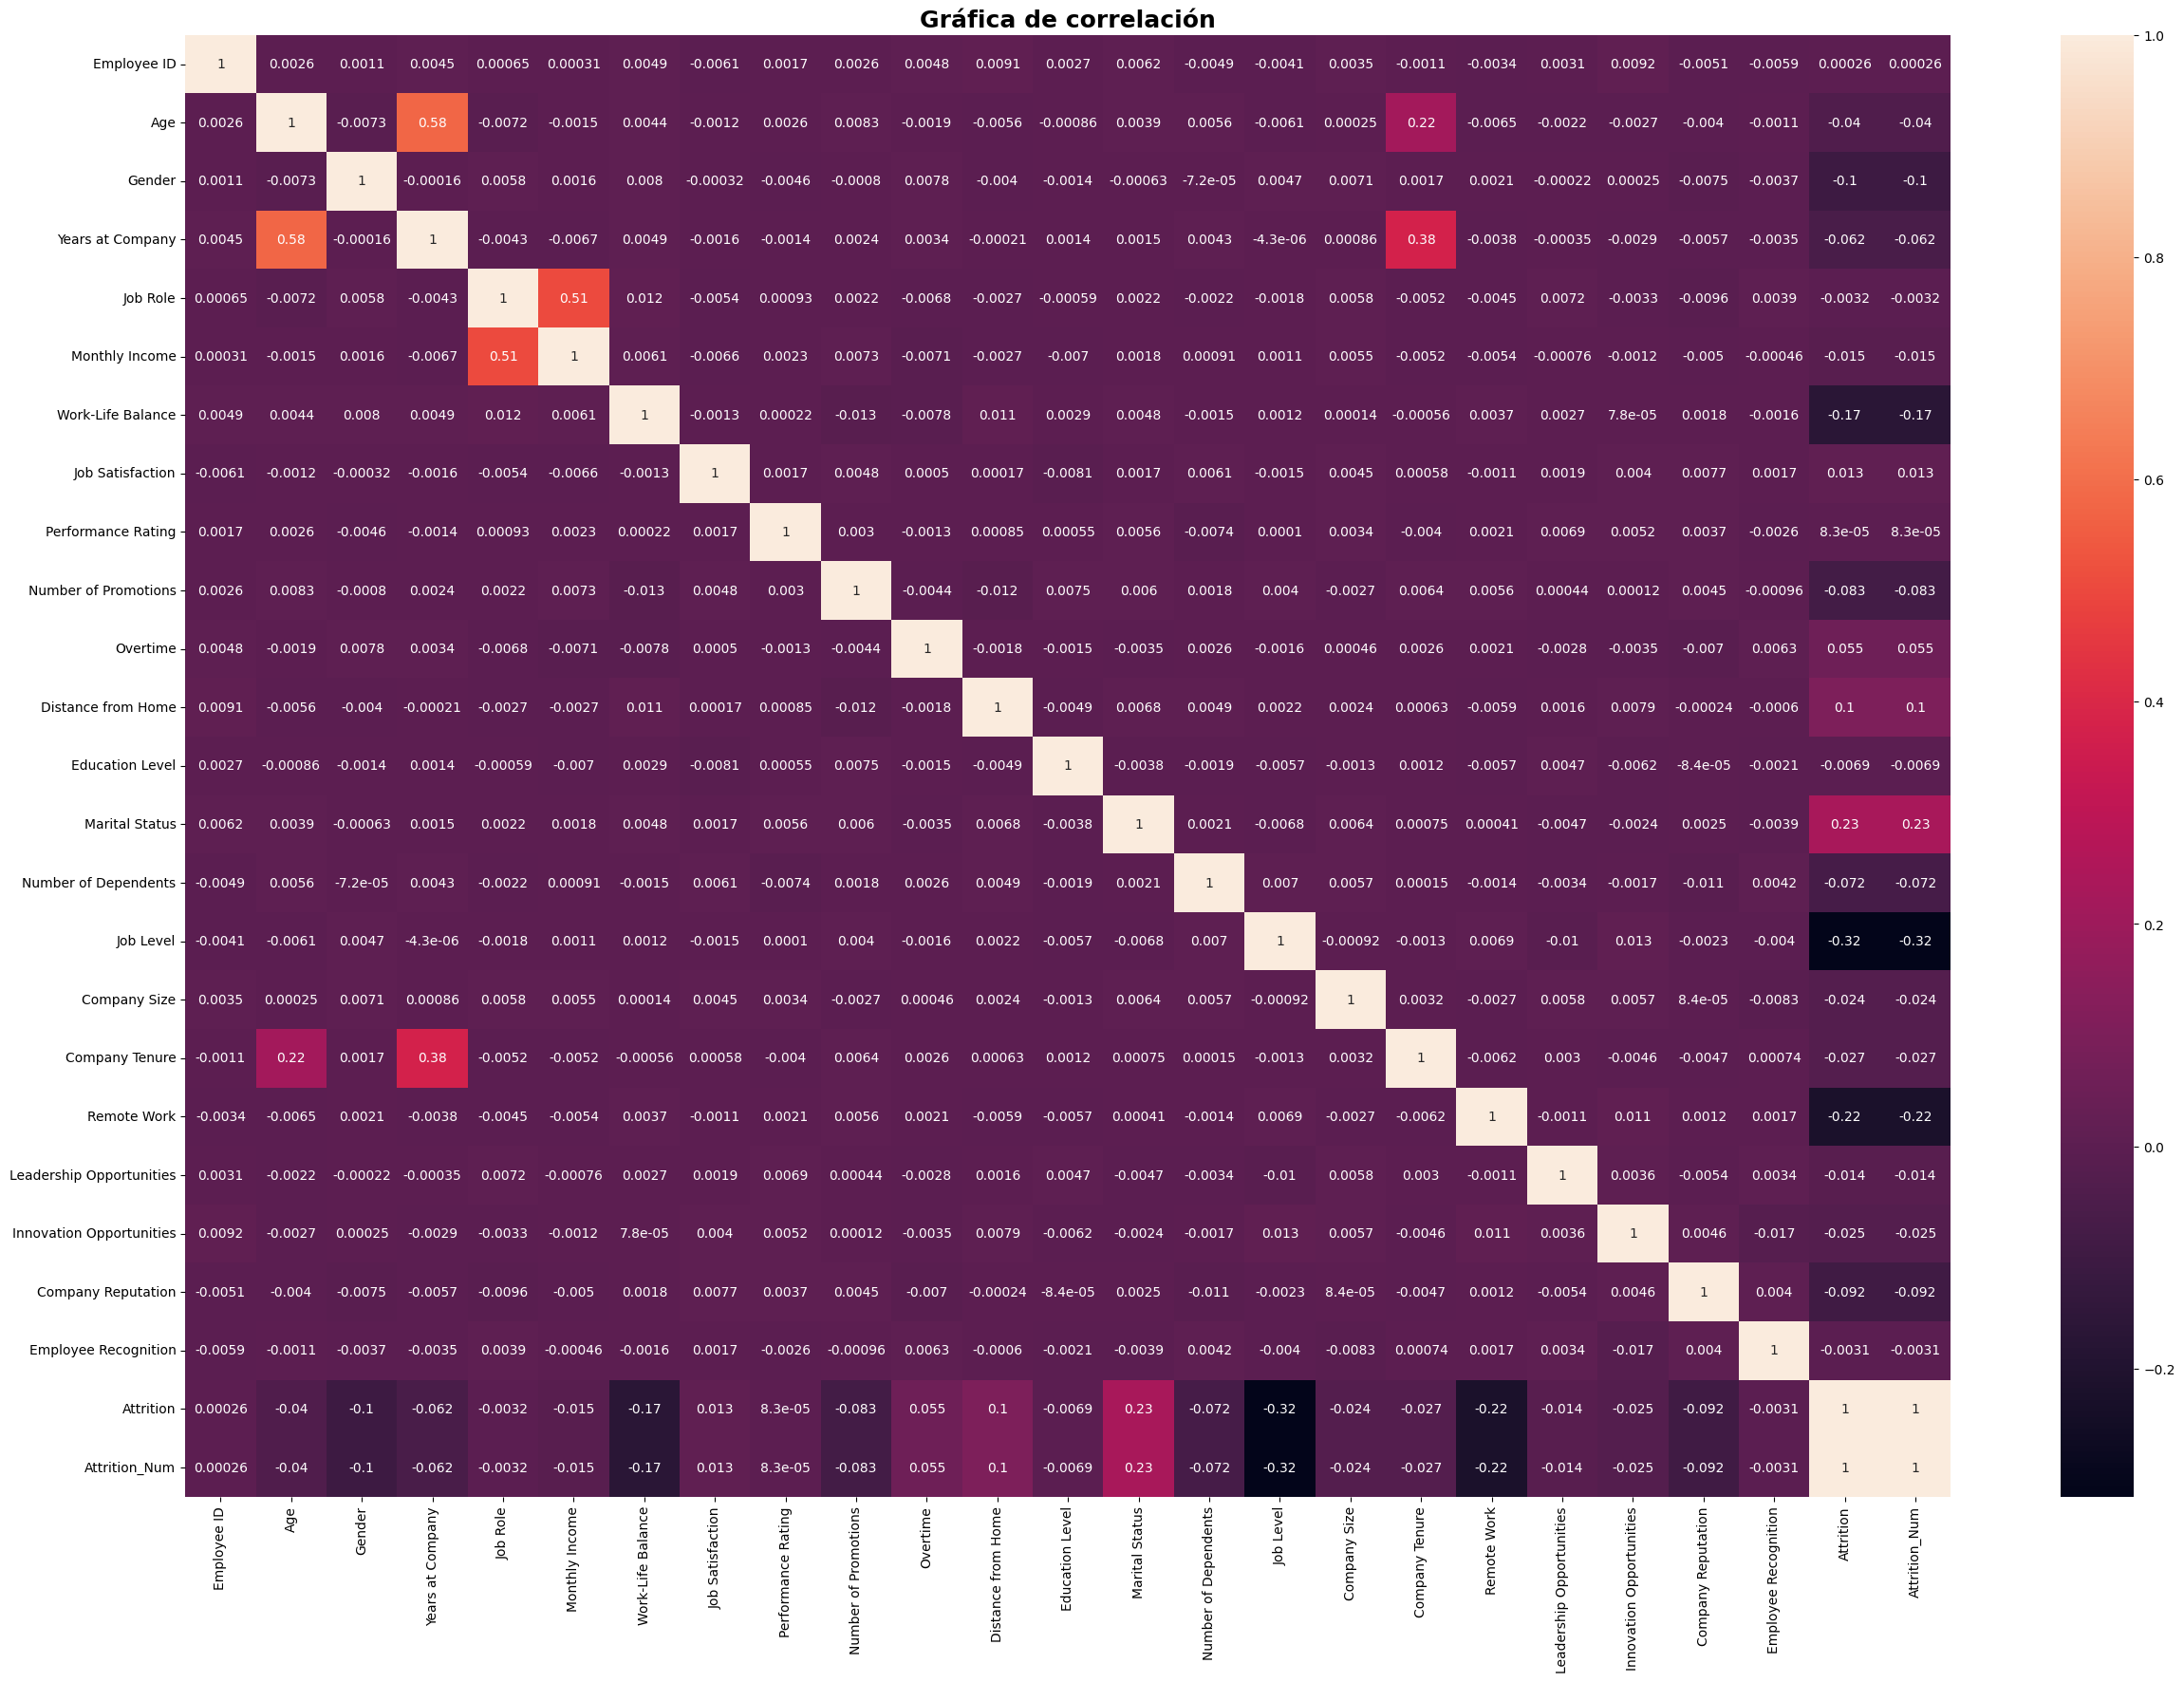

In [34]:
plt.figure(figsize=(30,20))
sns.heatmap(df_final.corr(), annot=True)
plt.title("Gráfica de correlación", fontsize=18, fontweight="bold")
plt.show()

## Fase 4 - Modelamiento

### Modelos Línea base

+ ***Acá todos los modelos deben tener un accuracy y roc_auc mayor o igual a 0.7***
+ Se deben incluir las métricas: acuracy, precision, recall, f1-score, matriz de confusión y roc_auc

In [35]:
def get_auc(real, prediccion):
    """ Retorna AUC, TPR y FPR """
    fpr, tpr, thresholds = roc_curve(real, prediccion)
    return auc(fpr, tpr), tpr, fpr, thresholds

In [36]:
def false_positive_rate(cm):
    """Recibe una matriz de confusión y retorna la métrica de False Positive Rate"""
    tn, fp, fn, tp = cm.ravel()
    return fp / (fp + tn)

In [37]:
# Define rangos para catalogar el valor de ROC_AUC
valores = [[0.5, 0.59], [0.6, 0.74]
,[0.75, 0.89], [0.9, 0.97]]
rangos = pd.DataFrame(np.array(valores).reshape(4,-1),
            index = ['Malo', 'Regular', 'Bueno', 'Muy bueno'], columns = ['Inferior', 'Superior'])
print(rangos)

           Inferior  Superior
Malo           0.50      0.59
Regular        0.60      0.74
Bueno          0.75      0.89
Muy bueno      0.90      0.97


In [38]:
def view_rango(df_rangos : pd.DataFrame, value_roc_auc : int):
    """ Retorna la clasificación del rendimiento según el valor de roc_auc """
    return df_rangos[(df_rangos['Inferior'] <= value_roc_auc) & (value_roc_auc <= df_rangos['Superior'])].index[0]

In [39]:
history = {'LogisticRegression': [], 'NaiveBayes': [], 'DecisionTreeClassifier': [], 'RandomForest': []}

### LogisticRegression

In [40]:
data_frame = df_final.copy()

In [41]:
X = data_frame.drop(['Attrition_Num', 'Attrition'], axis=1)
y = data_frame['Attrition_Num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=29)
model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [42]:
clases = ['Stayed', 'Left']

In [43]:
predictions = model.predict(X_test)
print(predictions[0:5])

[0 0 1 0 0]


In [44]:
model.score(X_test,y_test)

0.7103139621617957

In [45]:
print(classification_report(y_test, model.predict(X_test), target_names=['Stayed', 'Left']))

              precision    recall  f1-score   support

      Stayed       0.73      0.71      0.72      7712
        Left       0.69      0.71      0.70      7035

    accuracy                           0.71     14747
   macro avg       0.71      0.71      0.71     14747
weighted avg       0.71      0.71      0.71     14747



In [46]:
# Evaluación del modelo
matriz = confusion_matrix(y_test, predictions)
print('Matriz de Confusión:')
print(matriz)
# Se calcula la precisión del modelo
precision = precision_score(y_test, predictions)
print('Precisión del modelo:',"{0:.5}".format(precision))

Matriz de Confusión:
[[5502 2210]
 [2062 4973]]
Precisión del modelo: 0.69233


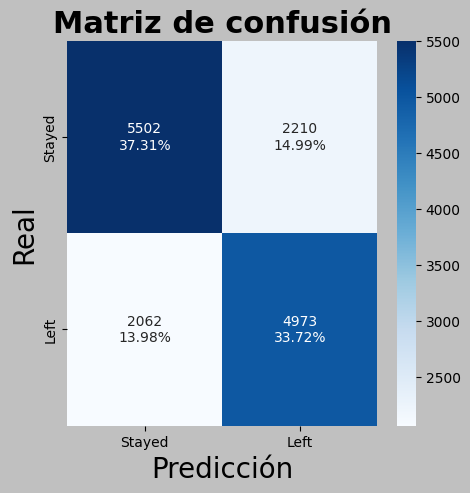

In [47]:
# Matriz de confusión

def plot_matriz():
    plt.figure(figsize=(5,5),facecolor= 'silver')
    group_counts = ["{0:0.0f}".format(value) for value in matriz.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in matriz.flatten()/matriz.sum()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
    plt.title("Matriz de confusión", fontsize=22, fontweight="bold")
    plt.xlabel("Predicción", fontsize=20)
    plt.ylabel("Real", fontsize=20)
    plt.xticks(rotation=0)
    plt.show()

plot_matriz()

In [48]:
tn, fp, fn, tp = matriz.ravel()
accuracy_manual = (tn+tp)/(tn+fp+fn+tp)
precision_manual = tp/(tp+fp)
recall_manual = tp/(tp+fn)
f1_score_manual = 2*(precision_manual*recall_manual/(precision_manual + recall_manual))
print("{0:<15}: {1:.5}".format("Accuracy", accuracy_manual))
print("{0:<15}: {1:.5}".format("Precision", precision_manual))
print("{0:<15}: {1:.5}".format("Recall", recall_manual))
print("{0:<15}: {1:.5}".format("F1-score", f1_score_manual))

Accuracy       : 0.71031
Precision      : 0.69233
Recall         : 0.70689
F1-score       : 0.69954


In [49]:
# Obtiene el conteo de las predicciones y los valores reales
print(Counter(y_test))
print(Counter(predictions))

Counter({0: 7712, 1: 7035})
Counter({0: 7564, 1: 7183})


In [50]:
cv_results = cross_validate(model, X_train, y_train, cv=5)

In [51]:
for clave, valor in cv_results.items():
  print(f"{clave:<15}:", valor)

fit_time       : [11.97989726  8.66372538  4.3410449   3.67485881  4.75208521]
score_time     : [0.00882316 0.00884891 0.00492525 0.00548673 0.0109241 ]
test_score     : [0.69856379 0.71008684 0.70541082 0.68854375 0.70786705]


In [52]:
# Obtiene el valor del área bajo la curva

roc_auc_model = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC_AUC score LogisticRegression : {:.2f}".format(roc_auc_model))

# Muestra el nivel de rendimiento del modelo considerando el ROC_AUC
print(view_rango(rangos, roc_auc_model))

ROC_AUC score LogisticRegression : 0.79
Bueno


In [53]:
auc_model_x, tpr_model_x, fpr_model_x, _ = get_auc(y_test, predictions)
print("{0:<10} = {1:.4f}".format("AUC", auc_model_x))
print("{0:<10} = {1}".format("TPR",tpr_model_x))
print("{0:<10} = {1}".format("FPR",fpr_model_x))


AUC        = 0.7102
TPR        = [0.        0.7068941 1.       ]
FPR        = [0.         0.28656639 1.        ]


In [54]:
# Guarda el historial de resultados
history = []
history.append([accuracy_manual, roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])])
print(pd.DataFrame(history, index = ['LogisticRegression'],
            columns = ['Accuracy', 'ROC_AUC']))

                    Accuracy   ROC_AUC
LogisticRegression  0.710314  0.787072


### NaiveBayes

In [55]:
data_frameNB = df_final.copy()

NB_X = data_frameNB.drop(['Attrition_Num', 'Attrition'], axis=1)
NB_y = data_frameNB['Attrition_Num']

NB_X_train, NB_X_test, NB_y_train, NB_y_test = train_test_split(NB_X, NB_y, test_size=0.33, random_state=29)

In [56]:
data_frameNB.columns = data_frameNB.columns.str.lower().str.replace(" ", "_", regex=True)


In [57]:
# Define el algoritmo a utilizar Naive Bayes
NB_modelo = GaussianNB()
# Entrenamiento del modelo
NB_modelo.fit(NB_X_train, NB_y_train)
# Validación del modelo
NB_y_predictions =NB_modelo.predict(NB_X_test)


In [58]:
# Acá guardaremos los resultados
history_recall = []

In [59]:
# Guarda el resultado para comparar
history_recall.append(recall_score(NB_y_test, NB_y_predictions))

In [60]:
# Obtiene el conteo de las predicciones y los valores reales
print(Counter(NB_y_test))
print(Counter(NB_y_predictions))

Counter({0: 7712, 1: 7035})
Counter({0: 7399, 1: 7348})


In [61]:
print(classification_report(NB_y_test, NB_y_predictions, target_names= ["Stayed", "Left"]))

              precision    recall  f1-score   support

      Stayed       0.73      0.70      0.72      7712
        Left       0.69      0.72      0.70      7035

    accuracy                           0.71     14747
   macro avg       0.71      0.71      0.71     14747
weighted avg       0.71      0.71      0.71     14747



In [62]:
# Evaluación del modelo
NB_matriz = confusion_matrix(NB_y_test, NB_y_predictions)
print('Matriz de Confusión:')
print(NB_matriz)
# Se calcula la precisión del modelo
NB_precision = precision_score(NB_y_test, NB_y_predictions)
print('Precisión del modelo:',"{0:.5}".format(NB_precision))

Matriz de Confusión:
[[5419 2293]
 [1980 5055]]
Precisión del modelo: 0.68794


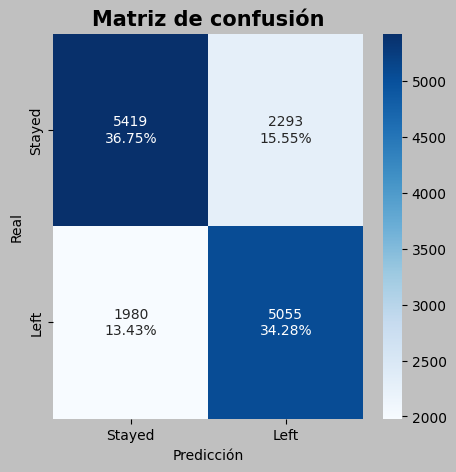

In [63]:
# Matriz de confusión

def plot_NB_matriz():
    plt.figure(figsize=(5,5),facecolor= 'silver')
    group_counts = ["{0:0.0f}".format(value) for value in NB_matriz.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in NB_matriz.flatten()/NB_matriz.sum()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(NB_matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
    plt.title("Matriz de confusión", fontsize=15, fontweight="bold")
    plt.xlabel("Predicción", fontsize=10)
    plt.ylabel("Real", fontsize=10)
    plt.xticks(rotation=0)
    plt.show()

plot_NB_matriz()

In [64]:
tn, fp, fn, tp = NB_matriz.ravel()
accuracy_manual = (tn+tp)/(tn+fp+fn+tp)
precision_manual = tp/(tp+fp)
recall_manual = tp/(tp+fn)
f1_score_manual = 2*(precision_manual*recall_manual/(precision_manual + recall_manual))
print("{0:<15}: {1:.5}".format("Accuracy", accuracy_manual))
print("{0:<15}: {1:.5}".format("Precision", precision_manual))
print("{0:<15}: {1:.5}".format("Recall", recall_manual))
print("{0:<15}: {1:.5}".format("F1-score", f1_score_manual))

Accuracy       : 0.71025
Precision      : 0.68794
Recall         : 0.71855
F1-score       : 0.70291


In [65]:
# Obtiene el valor del área bajo la curva

roc_auc_modelNB = roc_auc_score(NB_y_test, NB_modelo.predict_proba(NB_X_test)[:, 1])
print("ROC_AUC score LogisticRegression : {:.2f}".format(roc_auc_modelNB))

# Muestra el nivel de rendimiento del modelo considerando el ROC_AUC
print(view_rango(rangos, roc_auc_modelNB))

ROC_AUC score LogisticRegression : 0.79
Bueno


In [66]:
auc_NB_modelo, tpr_NB_modelo, fpr_NB_modelo, _ = get_auc(NB_y_test, NB_y_predictions)
print("{0:<10} = {1:.4f}".format("AUC", auc_NB_modelo))
print("{0:<10} = {1}".format("TPR",tpr_NB_modelo))
print("{0:<10} = {1}".format("FPR",fpr_NB_modelo))


AUC        = 0.7106
TPR        = [0.         0.71855011 1.        ]
FPR        = [0.         0.29732884 1.        ]


In [67]:
# Guarda el historial de resultados
history = []
history.append([accuracy_manual, roc_auc_score(NB_y_test, NB_modelo.predict_proba(NB_X_test)[:, 1])])
print(pd.DataFrame(history, index = ['NaiveBayes'],
            columns = ['Accuracy', 'ROC_AUC']))

            Accuracy   ROC_AUC
NaiveBayes  0.710246  0.788882


### DecisionTreeClassifier

In [68]:
data_frameDTC = df_final.copy()

In [69]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [70]:
DTC_X = data_frameDTC.drop(['Attrition_Num', 'Attrition'], axis=1)
DTC_y = data_frameDTC['Attrition_Num']

DTC_X_train, DTC_X_test, DTC_y_train, DTC_y_test = train_test_split(DTC_X, DTC_y, test_size=0.33, random_state=29)


In [71]:
def entropy(data_frameDTC) -> float:
    classes = np.unique(data_frameDTC)
    entropies = []
    for c in classes:
        p = sum(data_frameDTC == c) / len(data_frameDTC)
        current_entropy = p * np.log2(p)
        entropies.append(current_entropy)
    return -1 * sum(entropies)

In [72]:
# Ahora se crea un árbol que sólo tenga 3 niveles de profundidad.
tree = DecisionTreeClassifier(max_depth=7, criterion = "entropy")
tree.fit(DTC_X_train, DTC_y_train)
DTC_y_predictions = tree.predict(DTC_X_test)

In [73]:
entropy(data_frameDTC.columns)

4.643856189774723

In [74]:
print(classification_report(DTC_y_test, DTC_y_predictions, target_names=["Stayed", "Left"]))

              precision    recall  f1-score   support

      Stayed       0.74      0.72      0.73      7712
        Left       0.71      0.73      0.72      7035

    accuracy                           0.73     14747
   macro avg       0.72      0.73      0.72     14747
weighted avg       0.73      0.73      0.73     14747



In [75]:
# Evaluación del modelo
DTC_matriz = confusion_matrix(DTC_y_test, DTC_y_predictions)
print('Matriz de Confusión:')
print(DTC_matriz)
# Se calcula la precisión del modelo
DTC_precision = precision_score(DTC_y_test, DTC_y_predictions)
print('Precisión del modelo:',"{0:.5}".format(DTC_precision))

Matriz de Confusión:
[[5567 2145]
 [1908 5127]]
Precisión del modelo: 0.70503


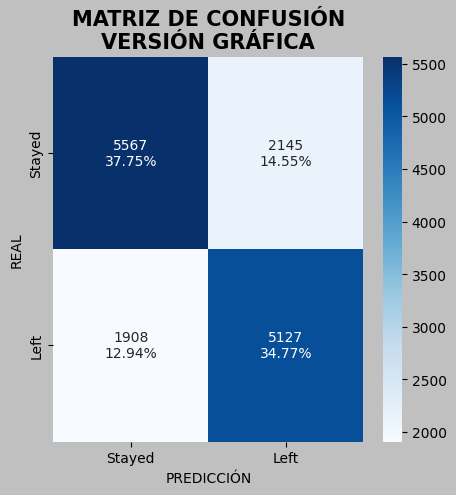

In [76]:
# Matriz de confusión de forma gráfica
DTC_matriz = confusion_matrix(DTC_y_test, tree.predict(DTC_X_test))
plt.figure(figsize=(5,5),facecolor= 'silver')
clases_DTC = ["Stayed","Left"]
group_counts = ["{0:0.0f}".format(value) for value in DTC_matriz.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in DTC_matriz.flatten()/DTC_matriz.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(DTC_matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title("MATRIZ DE CONFUSIÓN\nVERSIÓN GRÁFICA", fontsize=15, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=10)
plt.ylabel("REAL", fontsize=10)
plt.show()

In [77]:
tn, fp, fn, tp = DTC_matriz.ravel()
accuracy_manual = (tn+tp)/(tn+fp+fn+tp)
precision_manual = tp/(tp+fp)
recall_manual = tp/(tp+fn)
f1_score_manual = 2*(precision_manual*recall_manual/(precision_manual + recall_manual))
print("{0:<15}: {1:.5}".format("Accuracy", accuracy_manual))
print("{0:<15}: {1:.5}".format("Precision", precision_manual))
print("{0:<15}: {1:.5}".format("Recall", recall_manual))
print("{0:<15}: {1:.5}".format("F1-score", f1_score_manual))

Accuracy       : 0.72516
Precision      : 0.70503
Recall         : 0.72878
F1-score       : 0.71671


In [78]:
# Obtiene el valor del área bajo la curva

roc_auc_tree = roc_auc_score(DTC_y_test, tree.predict_proba(DTC_X_test)[:, 1])
print("ROC_AUC score LogisticRegression : {:.2f}".format(roc_auc_tree))

# Muestra el nivel de rendimiento del modelo considerando el ROC_AUC
print(view_rango(rangos, roc_auc_tree))

ROC_AUC score LogisticRegression : 0.81
Bueno


In [79]:
auc_tree_modelo, tpr_tree_modelo, fpr_tree_modelo, _ = get_auc(DTC_y_test, DTC_y_predictions)
print("{0:<10} = {1:.4f}".format("AUC", auc_tree_modelo))
print("{0:<10} = {1}".format("TPR",tpr_tree_modelo))
print("{0:<10} = {1}".format("FPR",fpr_tree_modelo))


AUC        = 0.7253
TPR        = [0.         0.72878465 1.        ]
FPR        = [0.         0.27813797 1.        ]


In [80]:
# Guarda el historial de resultados
history = []
history.append([accuracy_manual, roc_auc_score(DTC_y_test, tree.predict_proba(DTC_X_test)[:, 1])])
print(pd.DataFrame(history, index = ['DecisionTreeClassifier'],
            columns = ['Accuracy', 'ROC_AUC']))

                        Accuracy   ROC_AUC
DecisionTreeClassifier  0.725164  0.810544


### RandomForest

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [82]:
data_frameRF = df_final.copy()

In [83]:
RF_X = data_frameDTC.drop(['Attrition_Num', 'Attrition'], axis=1)
RF_y = data_frameDTC['Attrition_Num']

RF_X_train, RF_X_test, RF_y_train, RF_y_test = train_test_split(RF_X, RF_y, test_size=0.33, random_state=29)


In [84]:
random_forest = RandomForestClassifier(random_state = 29, n_estimators = 30, criterion = "entropy") # Instancia Random Forest.
random_forest.fit(RF_X_train, RF_y_train)
RF_y_predictions = random_forest.predict(RF_X_test)

In [85]:
print(classification_report(RF_y_test, RF_y_predictions, target_names=["Stayed", "Left"]))

              precision    recall  f1-score   support

      Stayed       0.73      0.77      0.75      7712
        Left       0.73      0.69      0.71      7035

    accuracy                           0.73     14747
   macro avg       0.73      0.73      0.73     14747
weighted avg       0.73      0.73      0.73     14747



In [86]:
# Evaluación del modelo
RF_matriz = confusion_matrix(RF_y_test, RF_y_predictions)
print('Matriz de Confusión:')
print(RF_matriz)
# Se calcula la precisión del modelo
RF_precision = precision_score(RF_y_test, RF_y_predictions)
print('Precisión del modelo:',"{0:.5}".format(RF_precision))

Matriz de Confusión:
[[5943 1769]
 [2203 4832]]
Precisión del modelo: 0.73201


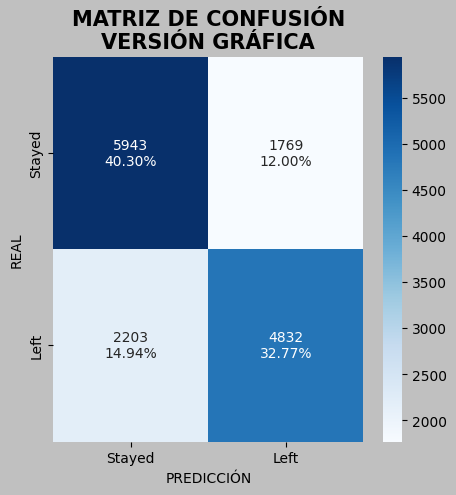

In [87]:
# Matriz de confusión de forma gráfica
RF_matriz = confusion_matrix(RF_y_test, random_forest.predict(RF_X_test))
plt.figure(figsize=(5,5),facecolor= 'silver')
clases_RF = ["Stayed","Left"]
group_counts = ["{0:0.0f}".format(value) for value in RF_matriz.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in RF_matriz.flatten()/RF_matriz.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(RF_matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title("MATRIZ DE CONFUSIÓN\nVERSIÓN GRÁFICA", fontsize=15, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=10)
plt.ylabel("REAL", fontsize=10)
plt.show()

In [88]:
# Obtiene las métricas a partir de la matriz de confusión
tn, fp, fn, tp = RF_matriz.ravel()
accuracy_manual = (tn+tp)/(tn+fp+fn+tp)
precision_manual = tp/(tp+fp)
recall_manual = tp/(tp+fn)
f1_score_manual = 2*(precision_manual*recall_manual/(precision_manual + recall_manual))
print("{0:<15}: {1:.5}".format("Accuracy", accuracy_manual))
print("{0:<15}: {1:.5}".format("Precision", precision_manual))
print("{0:<15}: {1:.5}".format("Recall", recall_manual))
print("{0:<15}: {1:.5}".format("F1-score", f1_score_manual))

Accuracy       : 0.73066
Precision      : 0.73201
Recall         : 0.68685
F1-score       : 0.70871


In [89]:
# Obtiene el valor del área bajo la curva

roc_auc_RF = roc_auc_score(RF_y_test, random_forest.predict_proba(RF_X_test)[:, 1])
print("ROC_AUC score LogisticRegression : {:.2f}".format(roc_auc_RF))

# Muestra el nivel de rendimiento del modelo considerando el ROC_AUC
print(view_rango(rangos, roc_auc_RF))

ROC_AUC score LogisticRegression : 0.82
Bueno


In [90]:
auc_RF_modelo, tpr_RF_modelo, fpr_RF_modelo, _ = get_auc(RF_y_test, RF_y_predictions)
print("{0:<10} = {1:.4f}".format("AUC", auc_RF_modelo))
print("{0:<10} = {1}".format("TPR",tpr_RF_modelo))
print("{0:<10} = {1}".format("FPR",fpr_RF_modelo))


AUC        = 0.7287
TPR        = [0.         0.68685146 1.        ]
FPR        = [0.         0.22938278 1.        ]


In [91]:
# Guarda el historial de resultados
history = []
history.append([accuracy_manual, roc_auc_score(RF_y_test, random_forest.predict_proba(RF_X_test)[:, 1])])
print(pd.DataFrame(history, index = ['RandomForest'],
            columns = ['Accuracy', 'ROC_AUC']))

              Accuracy   ROC_AUC
RandomForest  0.730657  0.820838


In [92]:
# El mejor estimador
random_forest.estimators_[-1]

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=643252703)

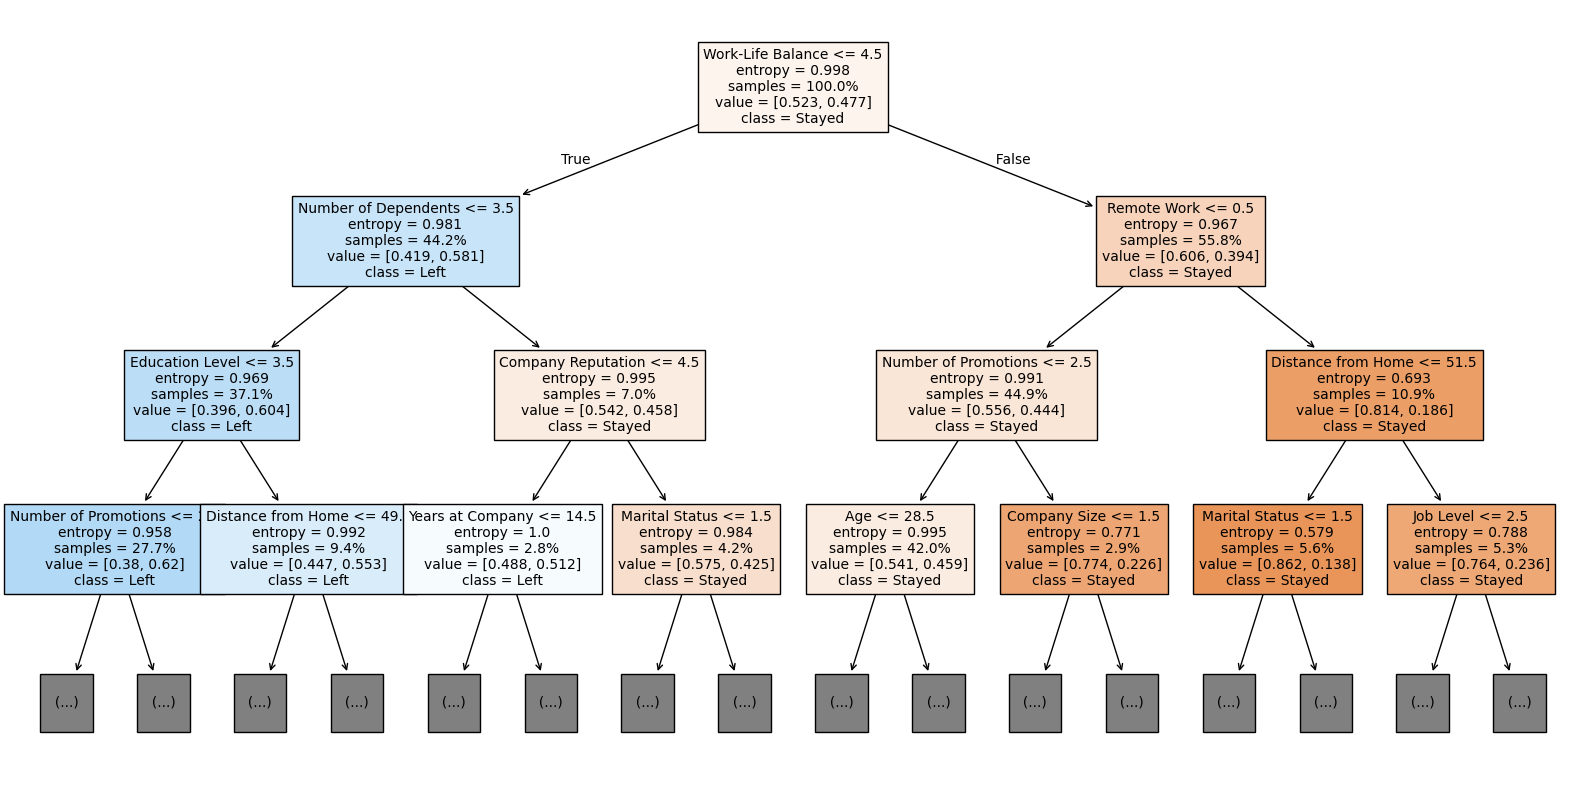

In [93]:
plt.figure(figsize = (20,10))
plot_tree( # Función que permite visualizar el árbol de decisión ajustado.
    random_forest.estimators_[-1], # Objeto árbol de decisión entrenado.
    feature_names = RF_X_test.columns, # Nombres de las variables utilizadas para entrenar.
    class_names = ["Stayed","Left"], # Nombre de las clases que se están prediciendo.
    label = "all", # Etiqueta todas características de cada nodo.
    proportion = True, # Visualiza las proporciones de datos en cada nodo de decisión,
    filled=True, # Colorea los nodos
    fontsize=10, # Establece el tamaño de la letra del texto dentro de cada nodo.
    max_depth = 3 # Profundidad máxima a mostrar
)
plt.show();

### Modelos línea base mejorada

+ ***Acá todos los modelos deben tener un roc_auc mayor o igual a 0.78***
+ Se deben incluir las métricas: acuracy, precision, recall, f1-score, matriz de confusión y roc_auc

### LogisticRegression

In [94]:
data_frame_LR = df_final.copy()

LR_X = data_frame_LR.drop(['Attrition','Attrition_Num'], axis=1)
LR_y = data_frame_LR['Attrition']
LR_best = SelectKBest(k=3)
LR_X_new = LR_best.fit_transform(X, y)
LR_selected = LR_best.get_support(indices=True)
print(LR_X.columns[LR_selected])

Index(['Marital Status', 'Job Level', 'Remote Work'], dtype='object')


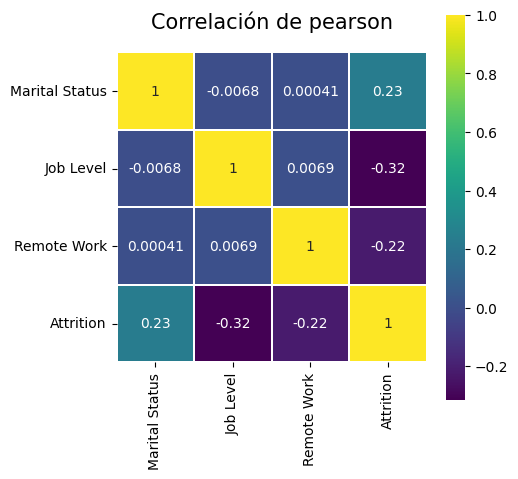

In [95]:
LR_used_features = LR_X.columns[LR_selected]
LR_features_corr = np.append(LR_used_features, ['Attrition'])
colormap = plt.cm.viridis
plt.figure(figsize=(5,5))
plt.title('Correlación de pearson', y=1.05, size=15)
sns.heatmap(data_frame_LR[LR_features_corr].astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [96]:
LR_X = data_frame_LR[LR_used_features]
# Se separan los datos de "train" en entrenamiento y prueba para probar el modelo
LR_X_train_new, LR_X_test_new, LR_y_train_new, LR_y_test_new = train_test_split(LR_X, LR_y, test_size=0.2, random_state = 29)
modelo_LR = LogisticRegression(solver='lbfgs', max_iter=1000)
# Entrenamiento del modelo
modelo_LR.fit(LR_X_train_new, LR_y_train_new)
# Validación del modelo
LR_y_pred = modelo_LR.predict(LR_X_test_new)

In [97]:
print(classification_report(LR_y_test_new, LR_y_pred, target_names= ["Stayed", "Left"]))

              precision    recall  f1-score   support

      Stayed       0.68      0.75      0.71      4628
        Left       0.70      0.62      0.66      4310

    accuracy                           0.69      8938
   macro avg       0.69      0.69      0.69      8938
weighted avg       0.69      0.69      0.69      8938



In [98]:
matriz_LR = confusion_matrix(LR_y_test_new, LR_y_pred)
print('Matriz de Confusión:')
print(matriz_LR)

Matriz de Confusión:
[[3488 1140]
 [1641 2669]]


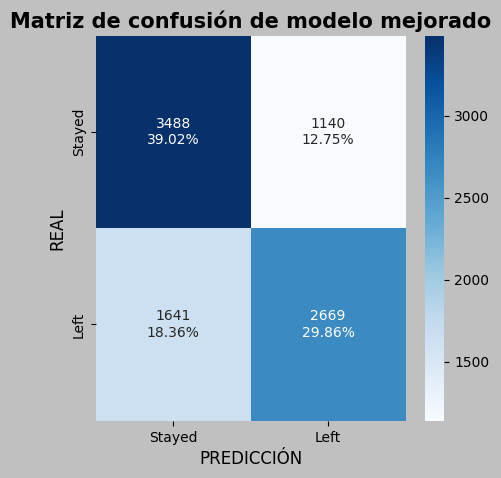

In [99]:
plt.figure(figsize=(5,5),facecolor= 'silver')
group_counts = ["{0:0.0f}".format(value) for value in matriz_LR.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz_LR.flatten()/matriz_LR.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matriz_LR, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title("Matriz de confusión de modelo mejorado", fontsize=15, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=12)
plt.ylabel("REAL", fontsize=12)
plt.show()

In [100]:
tn, fp, fn, tp = matriz_LR.ravel()
accuracy_manual = (tn+tp)/(tn+fp+fn+tp)
precision_manual = tp/(tp+fp)
recall_manual = tp/(tp+fn)
f1_score_manual = 2*(precision_manual*recall_manual/(precision_manual + recall_manual))
print("{0:<15}: {1:.5}".format("Accuracy", accuracy_manual))
print("{0:<15}: {1:.5}".format("Precision", precision_manual))
print("{0:<15}: {1:.5}".format("Recall", recall_manual))
print("{0:<15}: {1:.5}".format("F1-score", f1_score_manual))

Accuracy       : 0.68886
Precision      : 0.70071
Recall         : 0.61926
F1-score       : 0.65747


### NaiveBayes

In [101]:
data_frameNB = df_final.copy()

X = data_frameNB.drop(['Attrition', 'Attrition_Num'], axis=1)
y = data_frameNB['Attrition']
best = SelectKBest(k=3)
X_new = best.fit_transform(X, y)
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Marital Status', 'Job Level', 'Remote Work'], dtype='object')


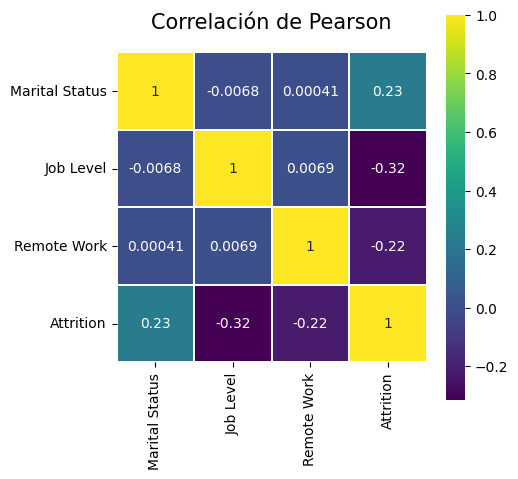

In [102]:
used_features = X.columns[selected]
features_corr = np.append(used_features, ['Attrition'])
colormap = plt.cm.viridis
plt.figure(figsize=(5,5))
plt.title('Correlación de Pearson', y=1.05, size=15)
sns.heatmap(data_frameNB[features_corr].astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [103]:
NB_X_new = data_frameNB[used_features]
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
NB_X_train_new, NB_X_test_new, NB_y_train_new, NB_y_test_new = train_test_split(NB_X_new, y, test_size=0.2, random_state = 29)
modelo_NB = GaussianNB()
# Entrenamiento del modelo
modelo_NB.fit(NB_X_train_new, NB_y_train_new)
# Validación del modelo
NB_y_pred = modelo_NB.predict(NB_X_test_new)

In [104]:
print(classification_report(NB_y_test_new, NB_y_pred, target_names= ["Stayed", "Left"]))

              precision    recall  f1-score   support

      Stayed       0.73      0.56      0.63      4628
        Left       0.62      0.78      0.69      4310

    accuracy                           0.66      8938
   macro avg       0.68      0.67      0.66      8938
weighted avg       0.68      0.66      0.66      8938



In [105]:
# Evaluación del modelo
matriz_NB = confusion_matrix(NB_y_test_new, NB_y_pred)
print('Matriz de Confusión:')
print(matriz_NB)

Matriz de Confusión:
[[2600 2028]
 [ 969 3341]]


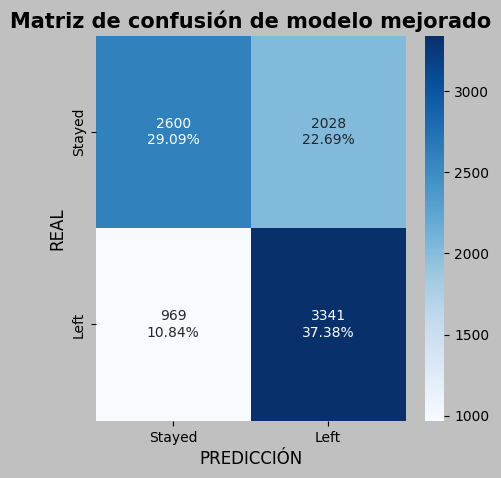

In [106]:
plt.figure(figsize=(5,5),facecolor= 'silver')
group_counts = ["{0:0.0f}".format(value) for value in matriz_NB.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz_NB.flatten()/matriz_NB.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matriz_NB, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title("Matriz de confusión de modelo mejorado", fontsize=15, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=12)
plt.ylabel("REAL", fontsize=12)
plt.show()

In [107]:
tn, fp, fn, tp = matriz.ravel()
accuracy_manual = (tn+tp)/(tn+fp+fn+tp)
precision_manual = tp/(tp+fp)
recall_manual = tp/(tp+fn)
f1_score_manual = 2*(precision_manual*recall_manual/(precision_manual + recall_manual))
print("{0:<15}: {1:.5}".format("Accuracy", accuracy_manual))
print("{0:<15}: {1:.5}".format("Precision", precision_manual))
print("{0:<15}: {1:.5}".format("Recall", recall_manual))
print("{0:<15}: {1:.5}".format("F1-score", f1_score_manual))

Accuracy       : 0.71031
Precision      : 0.69233
Recall         : 0.70689
F1-score       : 0.69954


In [108]:
# Guarda el resultado
history_recall.append(recall_score(NB_y_test_new, NB_y_pred))

### DecisionTreeClassifier

### RandomForest

## Fase 5 - Evaluación

Acá debe seleccionar el mejor modelo de la línea base mejorada usando una métrica que debe justificar

### Selección y justificación de la métrica

Deje acá sus comentarios

R//
Para elegir el mejor modelo, consideraremos la métrica ROC AUC. Un valor más alto de ROC AUC y accuracy indica un mejor rendimiento del modelo para distinguir entre las clases "Stayed" y "Left" respecto a los empleados.

En este caso, lamento mucho no haber podido terminar el trabajo debido al tiempo por mis deberes académicos en general. Sin embargo, si comparamos los ROC AUC obtenidos de los modelos que se pudieron realizar, el Random Forest ofrece un rendimiento más alto con un ROC AUC de 0.82, accuracy y precisión de 0.73

In [109]:
# Escriba su código acá

#### Obtención del mejor modelo usando la métrica seleccionada (recuerde que el roc_auc debe ser mayor a 0.78

#### Interpretación de todas las métricas del mejor modelo seleccionado

## Fase 6 - Deployment

In [110]:
# Escriba su código acá

# Pregunta

¿Recomendarían el modelo seleccionado?


Si la respuesta a la pregunta anterior es afirmativa: ¿Cuál es la razón por la cual lo recomendarían?



Si la respuesta a la pregunta es negativa: ¿Cuál es la alternativa propuesta?


R// Sí.

R// Debido a su alto ROC AUC, buena precisión, manejo de datos complejos como este caso y que es menos propenso al sobreajuste. También que permite identificar las características, que son factores que influyen en los resultados para los empleados.
